Check mass thresh:

In [1]:
from gal_goku_sims import xi

corr = xi.Corr()
basedir = '/scratch/06536/qezlou/Goku/FOF/HF'
pigs = corr.get_pig_dirs(basedir, z=2.5, narrow=False)

ModuleNotFoundError: No module named 'gal_goku_sims'

In [ ]:
pigs['pig_dirs']

['/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0025/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0026/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0054/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0055/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0056/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0072/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0073/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0074/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0207/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0208/output/PIG_003',
 '/scratch

In [ ]:
import os
os.mkdi

In [ ]:
np.array(cat['Mass'][10:20])
print(cat['Mass'])
ind = cat['Mass'] > 1e11
new_cat = cat[ind]
print(new_cat, cat)

dask.array<mul, shape=(382736,), dtype=float32, chunksize=(100000,), chunktype=numpy.ndarray> first: 65690550000000.0 last: 81177740000.0
HaloCatalog(size=295748) HaloCatalog(size=382736)


<KeysViewHDF5 ['corr', 'mbins', 'pairs', 'sim_tag']>
<HDF5 dataset "corr": shape (231, 50), type "<f8">


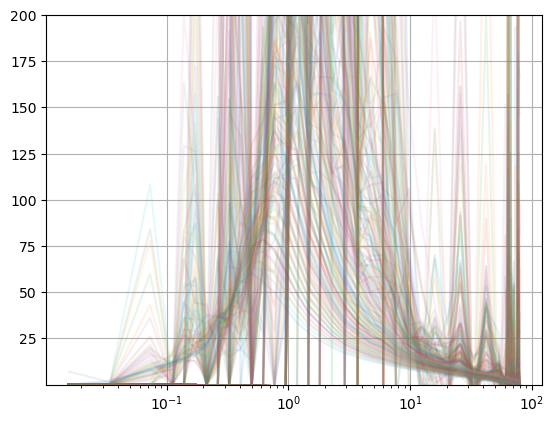

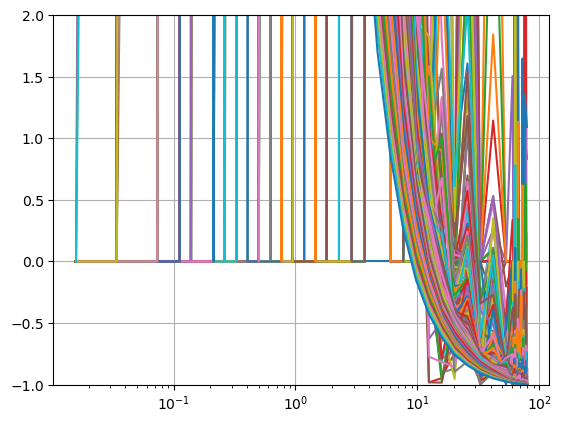

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import utils

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2/'
with h5py.File(f'{save_dir}compressed_10p_Box250_Part750_0396.hdf5','r') as f:
    print(f.keys())
    mbins = f['mbins'][:]
    corr = f['corr'][:]
    print(f['corr'])
    fig, ax = plt.subplots()
    figr, axr = plt.subplots()

    for i in range(corr.shape[0]):
        #ax.scatter(mbins, mbins*corr[i], s=10, marker='*')
        ax.plot(mbins, mbins*corr[i], alpha=0.1)
        fit = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3, constraints=False)
        ind = mbins < 10
        knots= mbins[ind]
        #spline = fit.fit_spline(mbins[ind], corr[ind], knots= knots)

        fine_mbins = 10**np.arange(np.log10(mbins[0]), np.log10(mbins[-1])+0.02, 0.05)
        #ax.plot(fine_mbins, fine_mbins*spline(fine_mbins), color='C1')
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.grid(True)
        ax.set_ylim((1e-2,2e2))



        axr.plot(mbins, np.abs(corr[i]/corr[0]) -1 )
        axr.set_xscale('log')
        axr.grid(True)
        axr.set_ylim((-1,2))
    

BaseStatEmu | 02/24/2025 05:20:56 PM | Rank 0 | INFO  |  Total sims files: 242 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2
BaseStatEmu | 02/24/2025 05:21:04 PM | Rank 0 | INFO  |  Total sims files: 14 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
BaseStatEmu | 02/24/2025 05:21:04 PM | Rank 0 | INFO  |  Total sims files: 14 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF


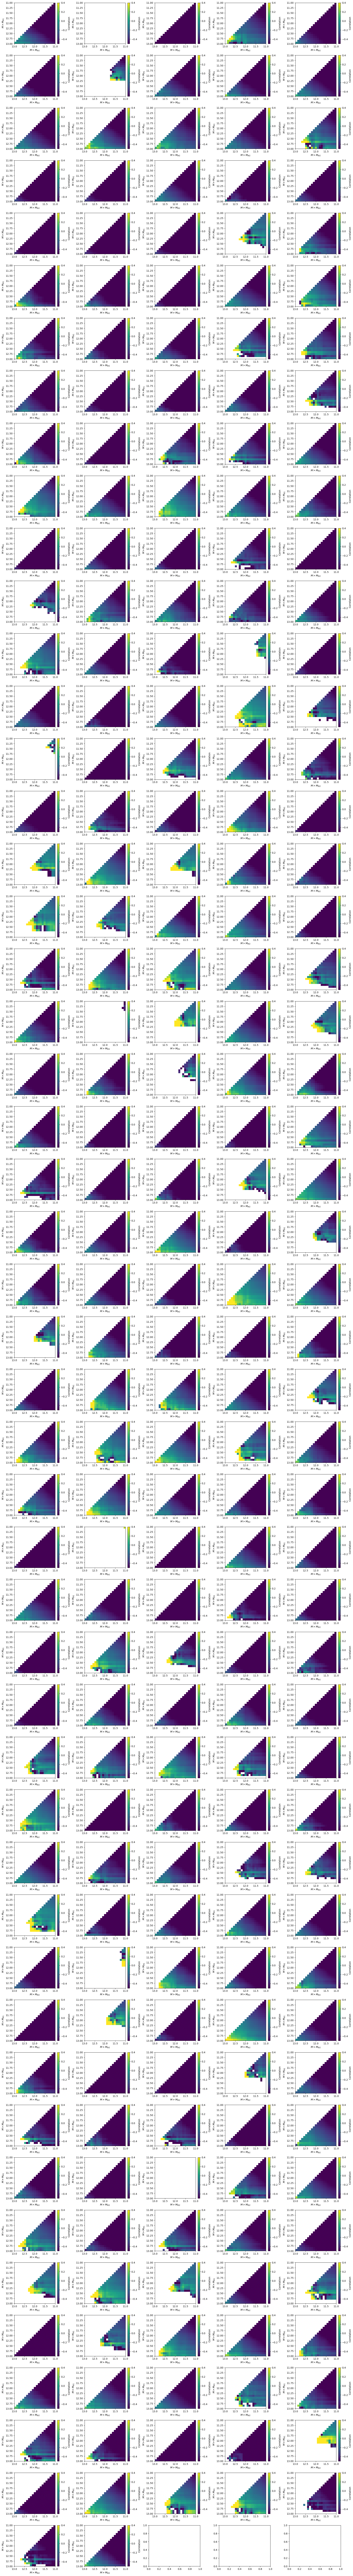

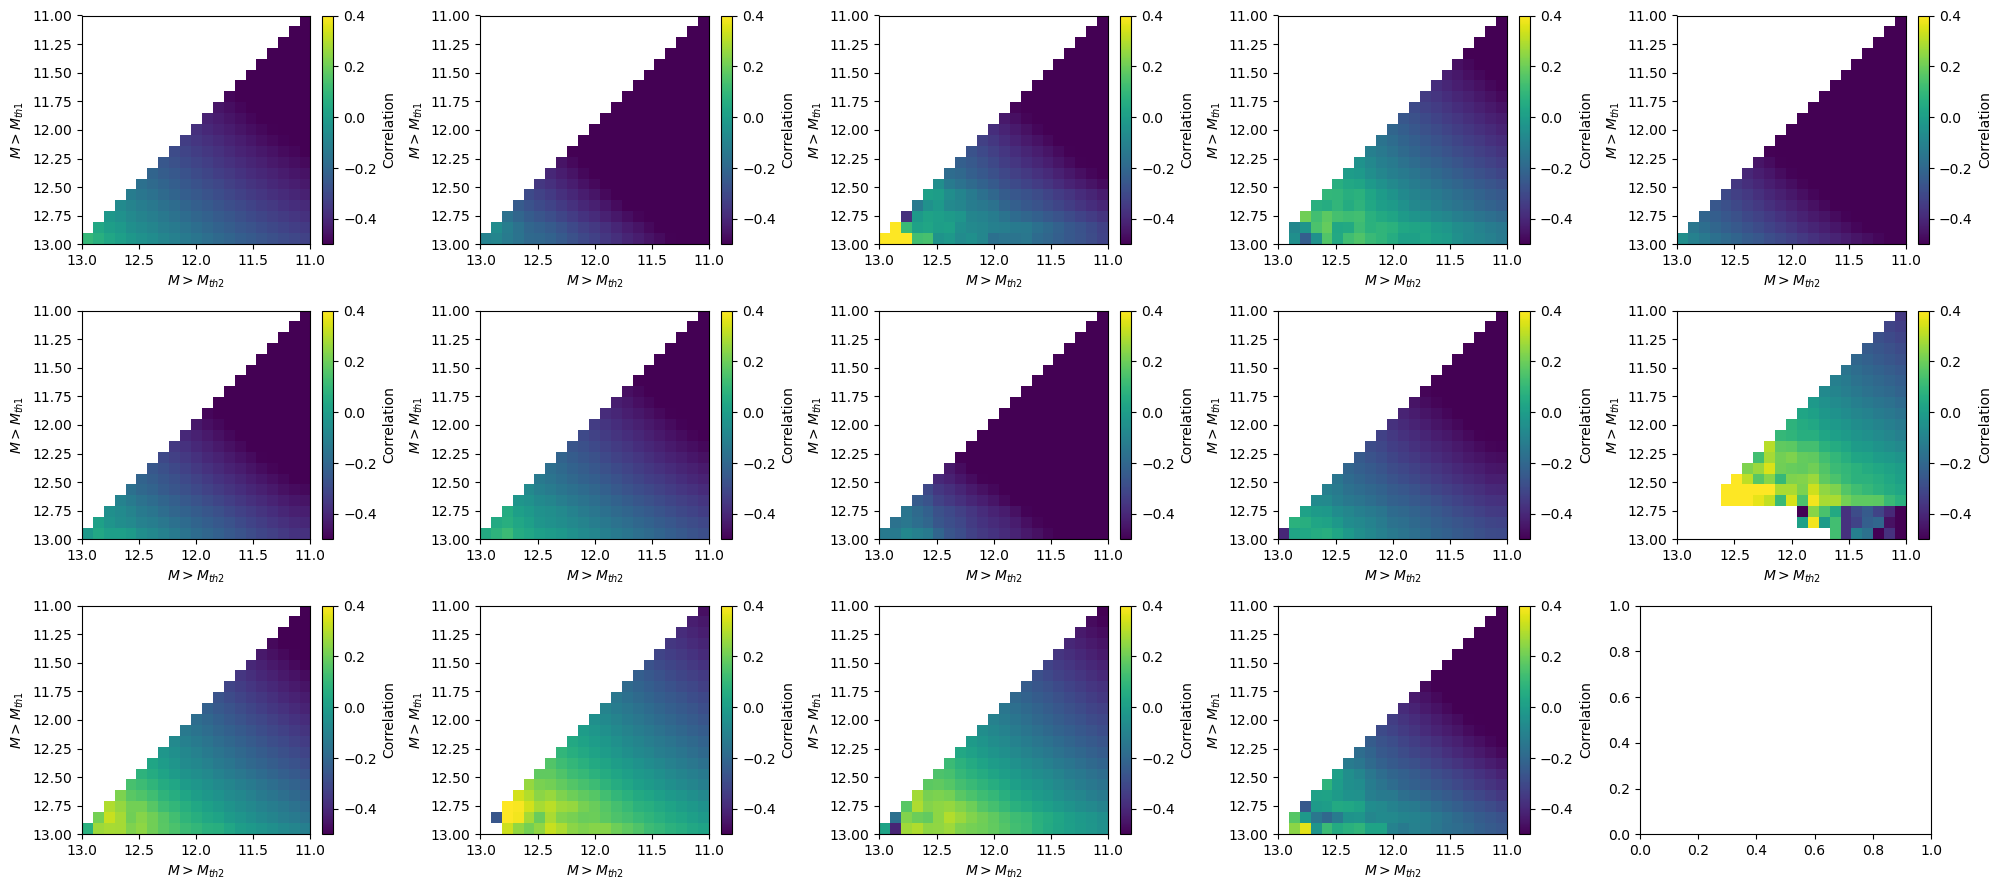

In [1]:
from gal_goku import plot
from glob import glob

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
plt_xi = plot.PlotXiSims()
plt_xi.plot_all_2d(r_ind=25, fid='L2', data_dir=data_dir)
plt_xi.plot_all_2d(r_ind=25, fid='HF', data_dir=data_dir)

    

In [17]:
corr.shape

(231, 50)

In [5]:
# The storage required to store all the xi data points for
# All sims
import numpy as np
231*50*1000 * np.dtype('float64').itemsize / 1e9

0.0924

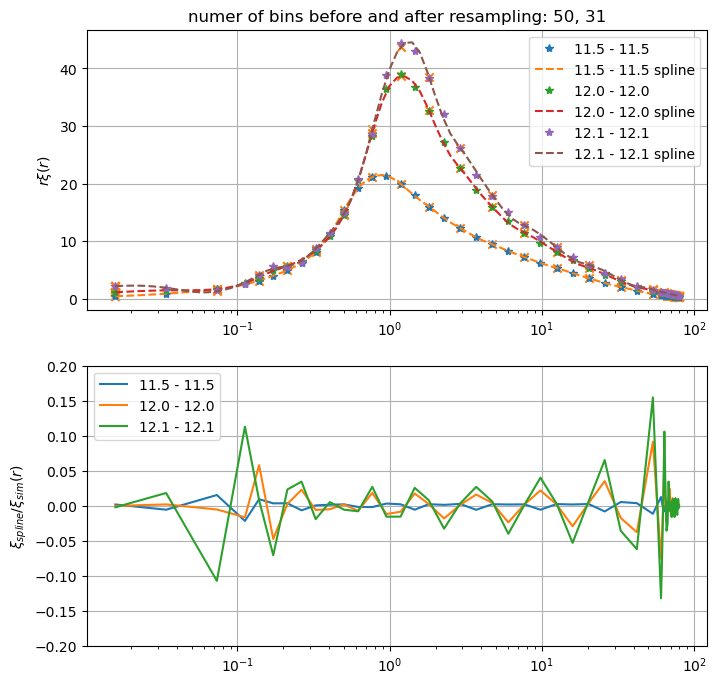

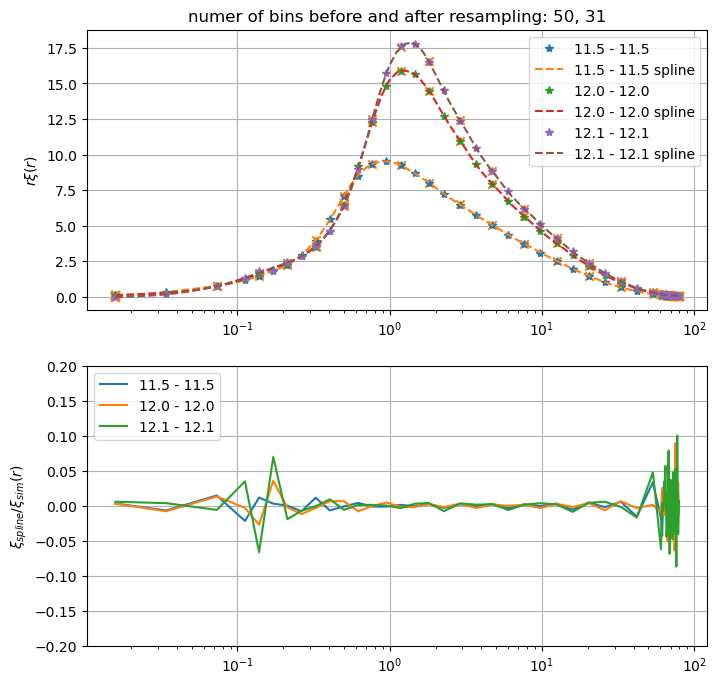

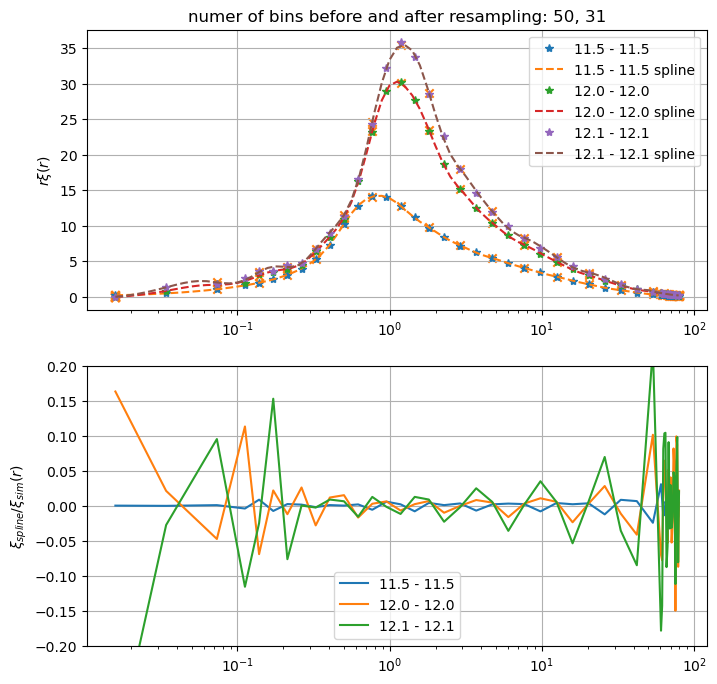

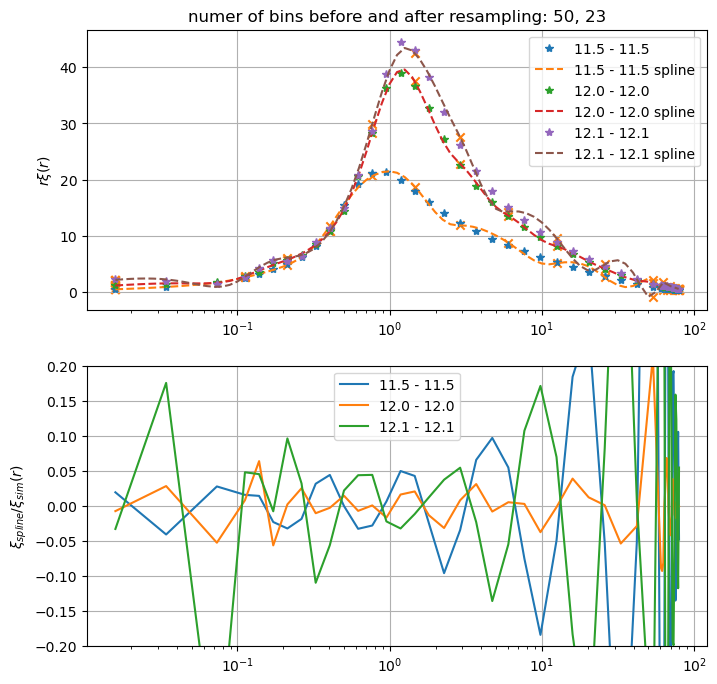

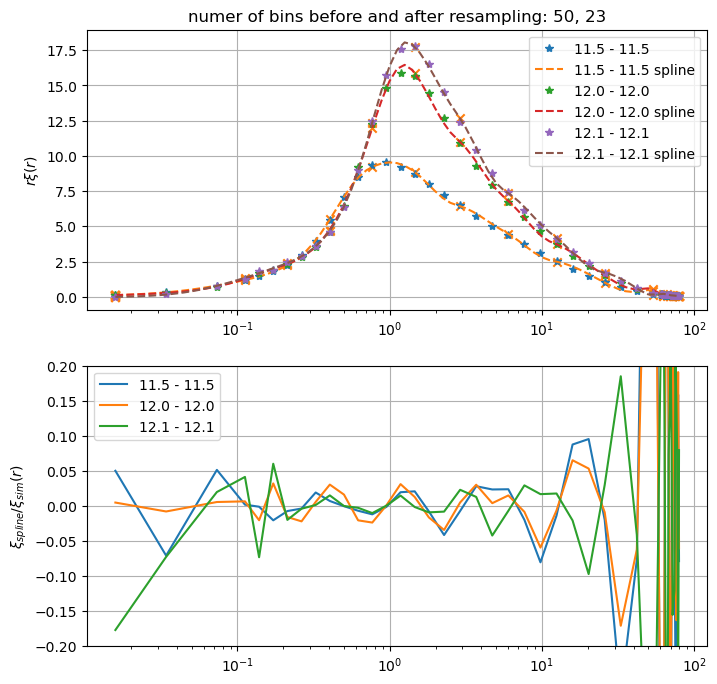

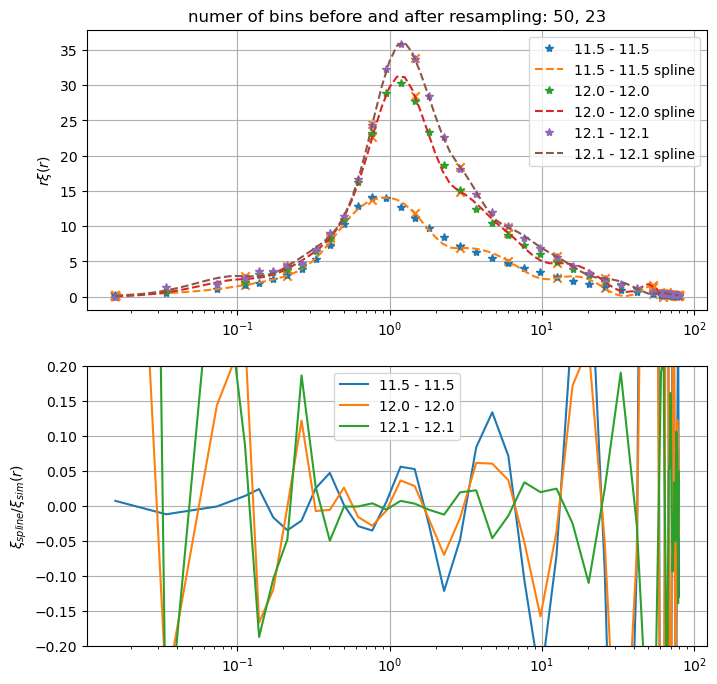

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import summary_stats
from gal_goku import utils

def test_spline_fits(sample_rate=2):

    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
    fid = 'HF'
    xi = summary_stats.Xi(data_dir, fid, logging_level='ERROR')
    for sim_tag in xi.sim_tags[0:3]:
        sim_tag, rbins, corr, mass_pairs = xi._load_1d(sim_tag)
        
        fig, ax = plt.subplots(2, 1, figsize=(8, 8))
        for m in [11.5, 12, 12.1]:
            mth =  [np.around(m, 1)]*2
            mass_pairs = np.around(mass_pairs, 1)
            ind = np.where((mass_pairs[:,0]==mth[0])*(mass_pairs[:,1]==mth[1]))
            spl_fitter = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3, constraints=False)
            knots = [rbins[0]]*3
            knots = np.append(knots, rbins[0::int(sample_rate)])
            knots = np.append(knots, [rbins[-1]]*3)
            spline = spl_fitter.fit_spline(rbins, corr[ind][0], knots)
            ax[0].plot(rbins, rbins * corr[ind][0], label=f'{mth[0]:.1f} - {mth[1]:.1f}', marker='*', ls='None')
            fine_rbins = 10**np.arange(np.log10(rbins[0]), np.log10(rbins[-1]), 0.05)
            ax[0].plot(fine_rbins, fine_rbins * spline(fine_rbins), label=f'{mth[0]:.1f} - {mth[1]:.1f} spline', ls='--')
            ax[0].scatter(knots, knots * spline(knots), color='C1', marker='x', ls='None')
            ax[1].plot(rbins, np.abs(spline(rbins)/corr[ind][0]) - 1, label=f'{mth[0]:.1f} - {mth[1]:.1f}')
        for i in range(2):
            ax[i].grid()
            ax[i].legend()
            #ax[i].set_xlim((0.01, 60))
            ax[i].set_xscale('log')
        
        ax[0].set_ylabel(r'$r \xi(r)$')
        ax[1].set_ylabel(r'$\xi_{spline} / \xi_{sim} (r)$')
        ax[1].set_ylim((-0.2, 0.2))
        #ax[0].set_yscale('log')
        ax[0].set_title(f'numer of bins before and after resampling: {len(rbins)}, {len(spline.c)}')
test_spline_fits(sample_rate=2)
test_spline_fits(sample_rate=3)

# PCA:

In [2]:
from gal_goku import summary_stats
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
xi = summary_stats.Xi(data_dir, fid='L2', logging_level='ERROR')
rbins, all_corrs = xi.load_all(two_d=True)
all_corrs.shape

(564, 21, 21, 50)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import summary_stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def do_pca(n_components=10, fid='HF'):
    """
    Check the accuracy of the PCA approximation for the correlation 
    function with `n_components` number of components
    """

    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
    xi = summary_stats.Xi(data_dir, fid, logging_level='ERROR')
    all_mass_bins =  np.around([12.5, 12.1 , 11.5], 2)
    fig, ax = plt.subplots(all_mass_bins.size, all_mass_bins.size, sharex=True, figsize=(8, 8))
    for i in range(all_mass_bins.size):
        m1 = all_mass_bins[i]
        for j in range(i, all_mass_bins.size):
            #print(i,j, all_mass_bins)
            m2 = all_mass_bins[j]
            mass_bins =  [m1, m2]
            rbins , _, corrs = xi.load_all(mass_bins)
            ind_nans = np.isnan(corrs)
            corrs[ind_nans] = 0
            corrs = corrs.squeeze()
            ind = rbins > 0.2
            rbins = rbins[ind]
            corrs = corrs[:, ind]
                
            scaler = StandardScaler()
            corrs_transformed = scaler.fit_transform(corrs)

            pca = PCA(n_components=n_components)
            pca.fit(corrs_transformed)

            eig_vec = pca.components_

            # Compare the original and approximated correlation functions
            corrs_approx = pca.inverse_transform(pca.transform(corrs_transformed))
            corrs_approx = scaler.inverse_transform(corrs_approx)

            
            for c in range(corrs.shape[0]):
                ax[i,j].plot(rbins, corrs[c] / corrs_approx[c] - 1, alpha=0.5, label='True' if i == 0 else "", ls='solid', color=f'C{i}')
            ax[i, j].set_title(f'mass bin {mass_bins[0]} - {mass_bins[1]}')
            ax[i,j].set_xscale('log')
            ax[i,j].grid()
            ax[i,j].set_ylim((-0.1, 0.1))
            ax[i,j].hlines(0.05, rbins[0], rbins[-1], color='k', ls='--')
            ax[i,j].hlines(-0.05, rbins[0], rbins[-1], color='k', ls='--')
            ax[i,j].hlines(0.03, rbins[0], rbins[-1], color='k', ls='--')
            ax[i,j].hlines(-0.03, rbins[0], rbins[-1], color='k', ls='--')
            if j ==0:
                ax[i,j].set_ylabel('Relative error')
            if i == all_mass_bins.size - 1:
                ax[i,j].set_xlabel('r [Mpc/h]')
            #ax[i,j].legend()
    fig.suptitle(f'{n_components} PCA components vs original {rbins.size} bins | fid {fid}')
    fig.tight_layout()

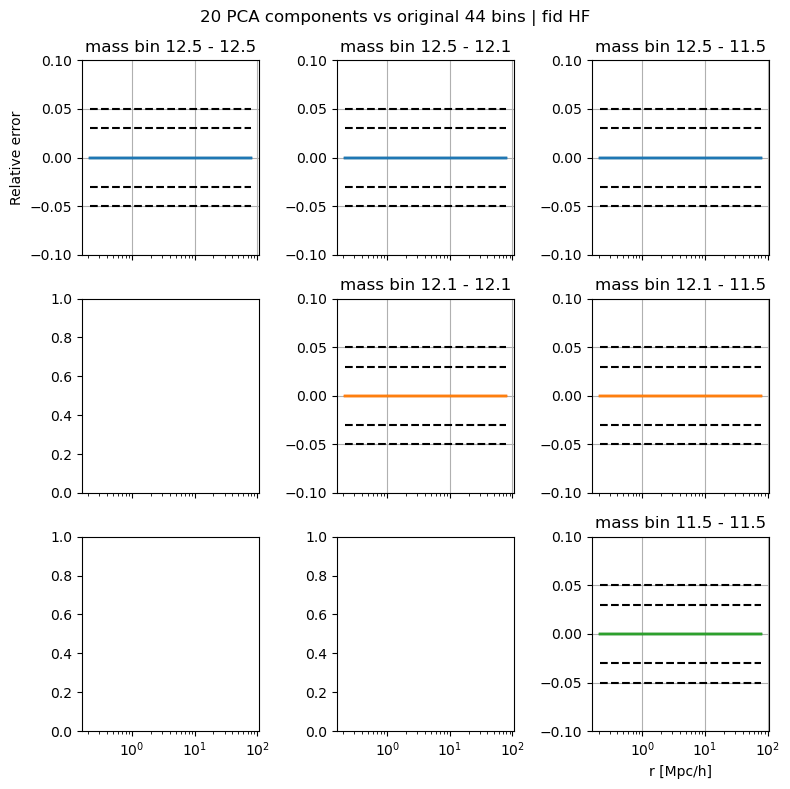

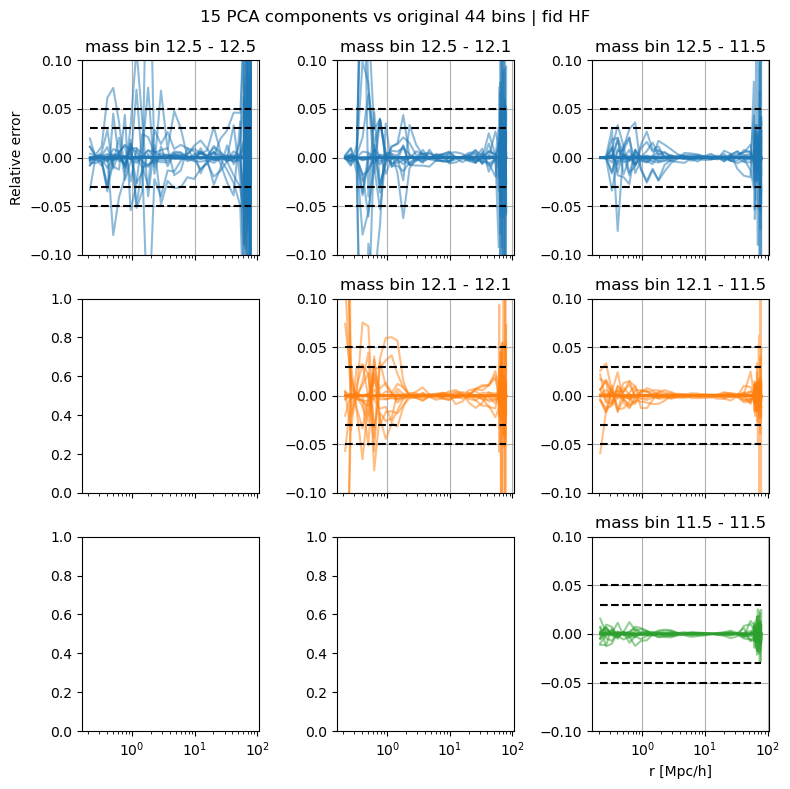

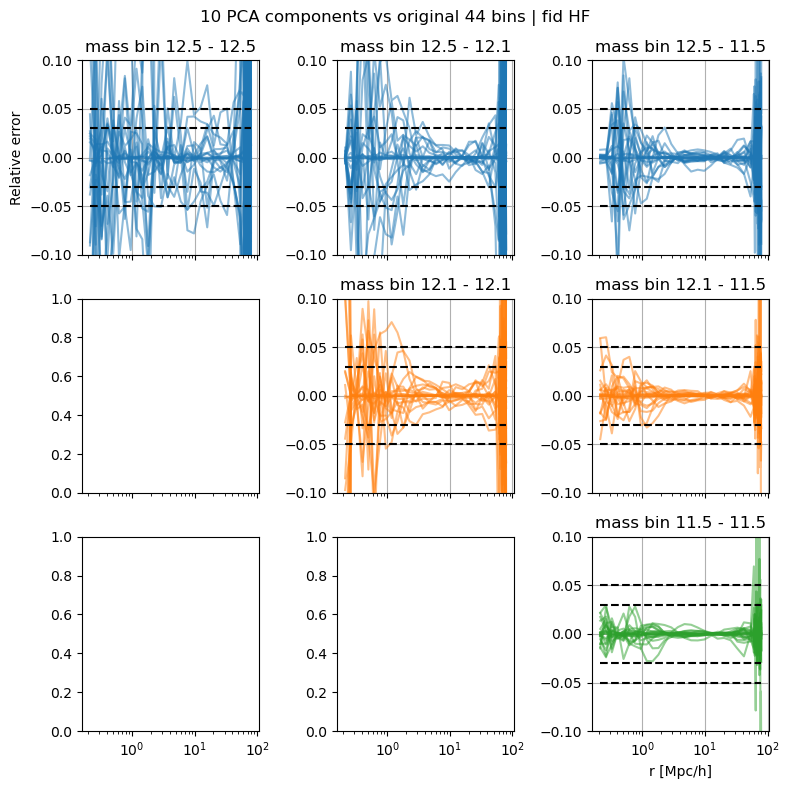

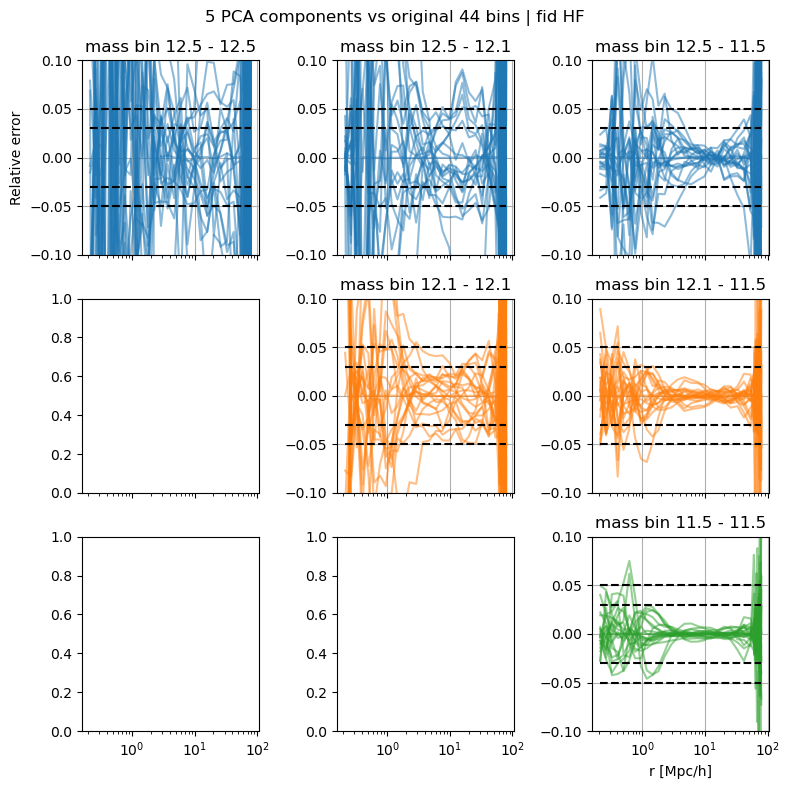

In [7]:
do_pca(n_components=20)
do_pca(n_components=15)
do_pca(n_components=10)
do_pca(n_components=5)

## L2:

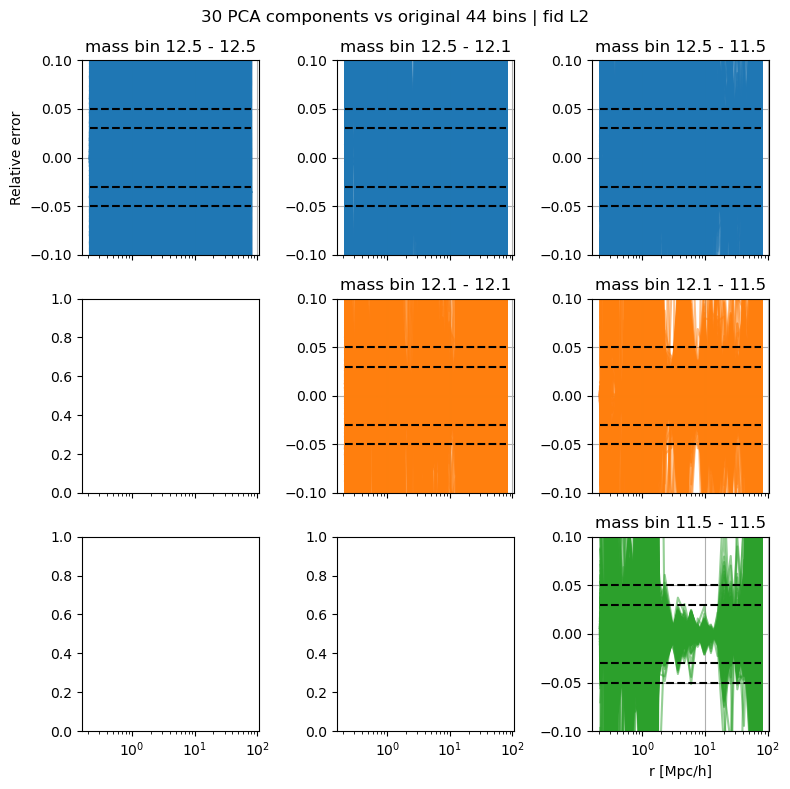

In [14]:
do_pca(n_components=30, fid='L2')

## PCA $(r, n_1, n_2)$:

training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)
training on (20, 441)


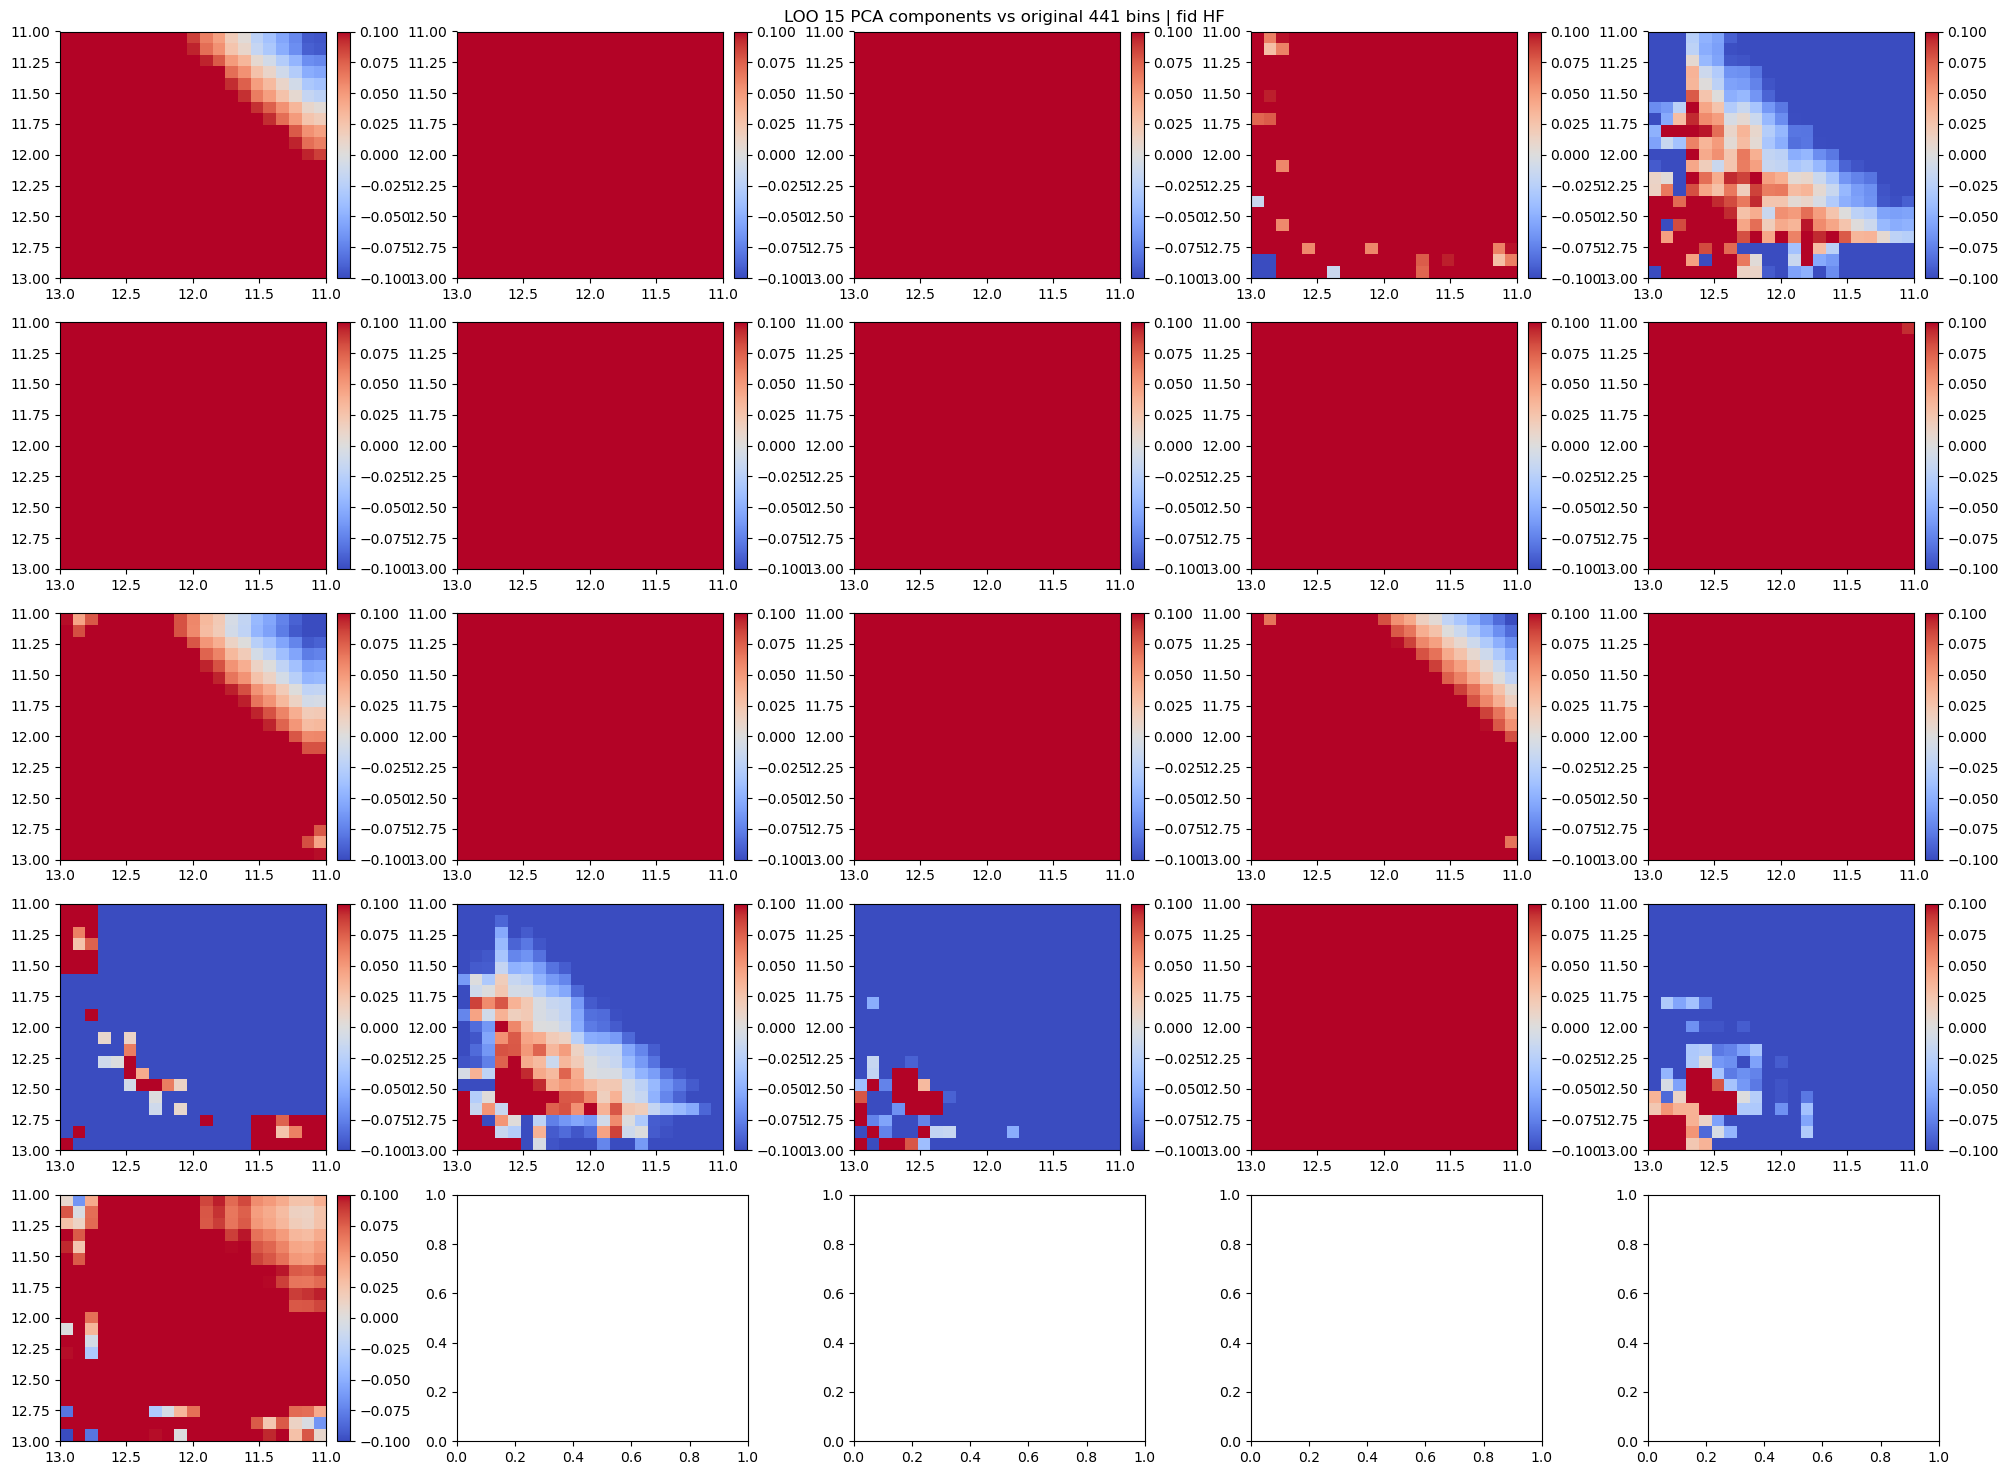

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import summary_stats
from gal_goku import plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def do_pca_n1_n2(n_components=10, fid='HF'):
    """
    Check the accuracy of the PCA approximation for the correlation 
    function with `n_components` number of components
    """

    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
    xi = summary_stats.Xi(data_dir, fid, logging_level='ERROR')
    plot_xi = plot.PlotXiSims()
    rbins, mass_bins, corr_2d = xi.load_all(r_ind=25, two_d=True)
    orig_shape = corr_2d.shape
    per_panel = 1
    rows, columns = plot_xi._setup_panels(sim_nums=len(xi.sim_tags), per_panel=per_panel)
    fig, ax = plt.subplots(rows, columns, figsize=(4*columns, 3*rows))
    for i in range(orig_shape[0]):
        corrs = corr_2d.reshape(corr_2d.shape[0], -1)
        scaler = StandardScaler()
        corrs_transformed = scaler.fit_transform(np.delete(corrs, i, axis=0))
        print(f'training on {corrs_transformed.shape}')

        pca = PCA(n_components=n_components)
        pca.fit(corrs_transformed)

        # Compare the original and approximated correlation functions
        corrs_approx = pca.inverse_transform(pca.transform(corrs[i][np.newaxis, :]))
        corrs_approx = scaler.inverse_transform(corrs_approx)

        corrs_approx = corrs_approx.reshape(orig_shape[1], orig_shape[2])
    
   

        indx, indy = np.floor(i/columns).astype(int), i%columns
        im = ax[indx, indy].imshow(corrs_approx/corr_2d[i] - 1, origin='lower', 
                                    extent=[mass_bins[0], mass_bins[-1], mass_bins[0],  mass_bins[-1],], 
                                    cmap='coolwarm', aspect='auto', vmin=-0.1, vmax=0.1)
        cbar = fig.colorbar(im, ax=ax[indx, indy], fraction=0.046, pad=0.04)
    fig.suptitle(f'LOO {n_components} PCA components vs original {orig_shape[1]*orig_shape[2]} bins | fid {fid}')
    fig.tight_layout()
#do_pca_n1_n2(n_components=10)
do_pca_n1_n2(n_components=15, fid='HF')



In [7]:
from gal_goku import summary_stats
from glob import glob

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'

xi = summary_stats.Xi(data_dir, 'HF')
corr_2d, mass_bins, rbins = xi.corr_2d(sim_tag=xi.sim_tags[0], r_ind=25, symmetric=True)

corr_2d.shape


summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 02/27/2025 10:57:41 PM | Rank 0 | INFO  |  Total sims files:

(21, 21)

## Spline:

[ 0.2         0.2         0.2         0.2         0.5         0.8
  1.          1.5         2.          2.54999105  3.25122719  4.14530012
  5.28523911  6.73865622  8.59175654 10.95445115 13.96687621 17.80770469
 22.70474383 28.94844681 36.90914019 47.05898864 60.         60.
 62.22222222 64.44444444 66.66666667 68.88888889 71.11111111 73.33333333
 75.55555556 77.77777778 80.         80.         80.         80.        ]
[ 0.21268578  0.26343238  0.32628708  0.40413884  0.50056595  0.62000047
  0.76793194  0.9511597   1.17810543  1.45920017  1.80736382  2.27499553
  2.90060912  3.69826365  4.71526961  6.01194766  7.66520638  9.77310384
 12.46066368 15.88729045 20.25622426 25.82659532 32.9287935  41.98406441
 53.52949432 60.52631579 61.57894737 62.63157895 63.68421053 64.73684211
 65.78947368 66.84210526 67.89473684 68.94736842 70.         71.05263158
 72.10526316 73.15789474 74.21052632 75.26315789 76.31578947 77.36842105
 78.42105263 79.47368421]
[ 5.60690986e+01  3.64061392e+01  9.317

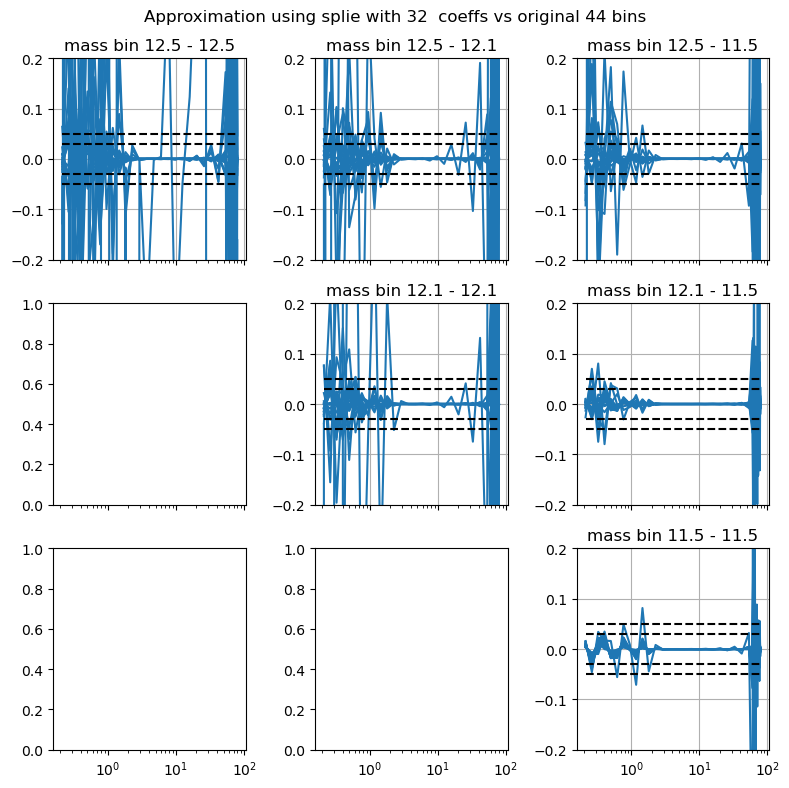

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import summary_stats
from gal_goku import utils
from scipy.interpolate import make_lsq_spline
from scipy.interpolate import generate_knots

def do_spline(sample_rate=2):
    """
    Check the accuracy of the PCA approximation for the correlation 
    function with `n_components` number of components
    """

    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
    fid = 'HF'
    xi = summary_stats.Xi(data_dir, fid, logging_level='ERROR')
    all_mass_bins =  np.around([12.5, 12.1 , 11.5], 2)
    fig, ax = plt.subplots(all_mass_bins.size, all_mass_bins.size, sharex=True, figsize=(8, 8))
    for i in range(all_mass_bins.size):
        m1 = all_mass_bins[i]
        for j in range(i, all_mass_bins.size):
            #print(i,j, all_mass_bins)
            m2 = all_mass_bins[j]
            mass_bins =  [m1, m2]
            rbins , corrs = xi.load_all(mass_bins)
            corrs = corrs.squeeze()
            ind = rbins > 0.2
            rbins = rbins[ind]
            corrs = corrs[:, ind]  
            
            
            knots = [0.2, 0.2, 0.2, 0.2, 0.5, 0.8, 1, 1.5, 2]
            knots = np.append(knots, np.logspace(np.log10(2), np.log10(60), 15)[1:])
            knots = np.append(knots, np.linspace(60, 80, 10))
            knots = np.append(knots, [knots[-1]]*3)

            rbins = np.log10(rbins)
            knots = np.log10(knots)

            for c in range(corrs.shape[0]):
                # Fit the spline 
                
                #knots = list(generate_knots(rbins, corrs[c], k=3, s=2e-1))[-1]
                spline = make_lsq_spline(rbins, corrs[c], k=3, t=knots)
                ax[i,j].plot(10**rbins, spline(rbins)/corrs[c] - 1, color='C0')
            ax[i, j].set_title(f'mass bin {mass_bins[0]} - {mass_bins[1]}')
            ax[i,j].set_xscale('log')
            ax[i,j].grid()
            ax[i,j].set_ylim((-0.2, 0.2))
            ax[i,j].hlines(0.05, 10**rbins[0],  10**rbins[-1], color='k', ls='--')
            ax[i,j].hlines(-0.05, 10**rbins[0],  10**rbins[-1], color='k', ls='--')
            ax[i,j].hlines(0.03, 10**rbins[0],  10**rbins[-1], color='k', ls='--')
            ax[i,j].hlines(-0.03, 10**rbins[0],  10**rbins[-1], color='k', ls='--')
            #ax[i,j].legend()
    print(10**knots)
    print(10**rbins)
    print(spline.c)
    fig.suptitle(f'Approximation using splie with {spline.c.size}  coeffs vs original {rbins.size} bins')
    fig.tight_layout()
do_spline()

BaseStatEmu | 02/26/2025 03:20:08 PM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF


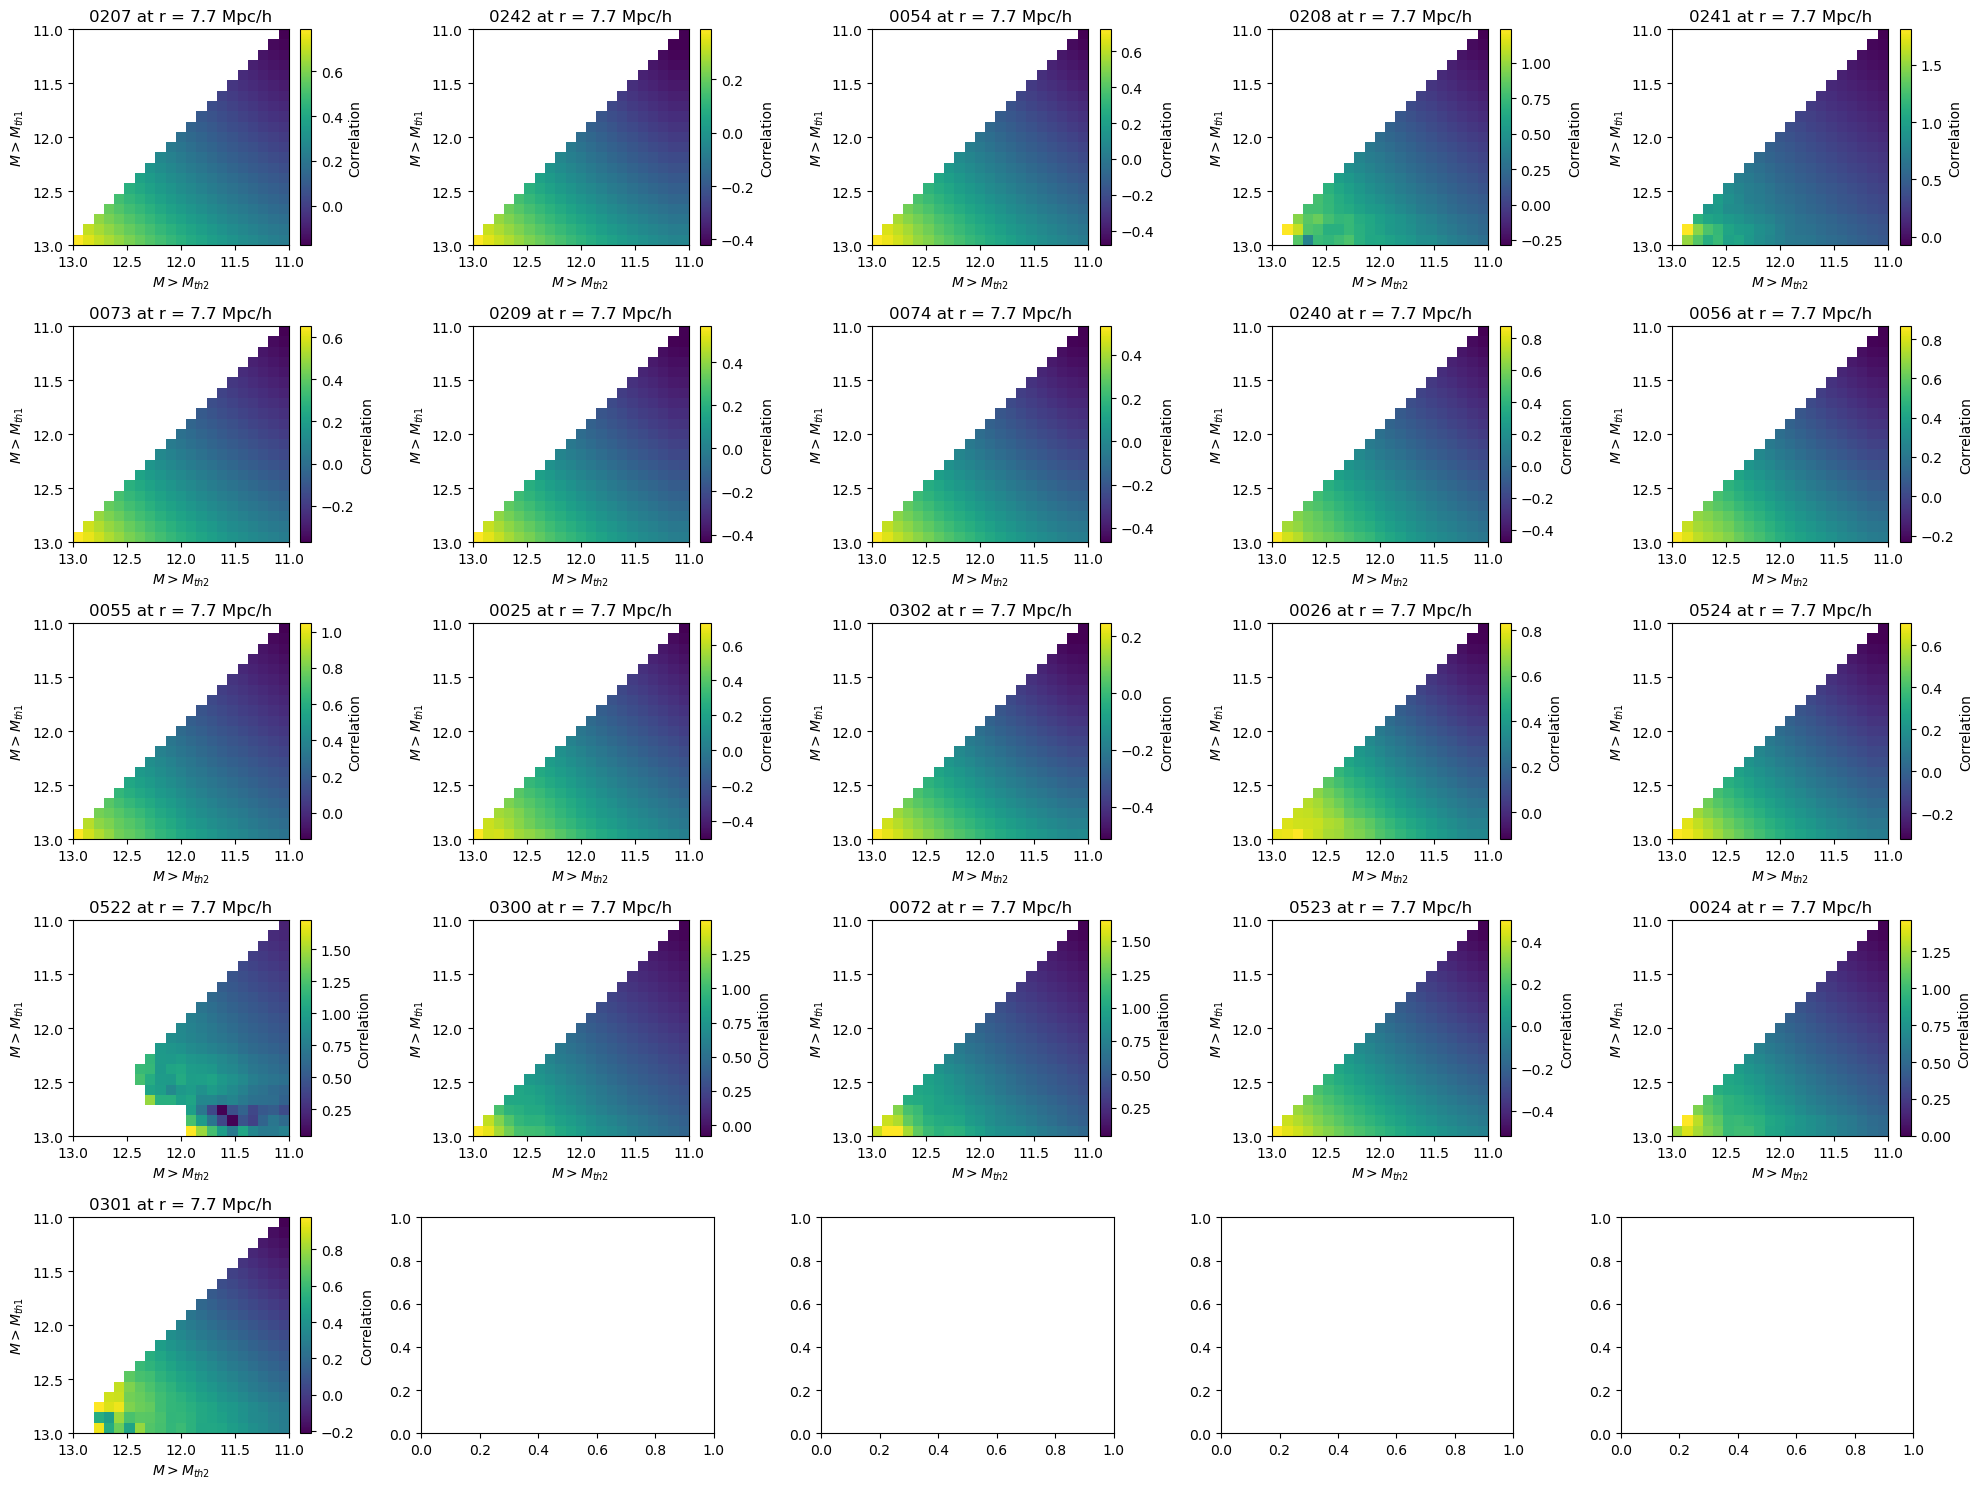

In [1]:
from gal_goku import plot
from glob import glob

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
plt_xi = plot.PlotXiSims()
plt_xi.plot_all_2d(r_ind=22, fid='HF', data_dir=data_dir)

    

## Num of training points for each simulation: 

If we keep only 6 mass theshold bins (instead of 13) and only 5 spline coefficients for the corr func (instead of 50), we have this training points for each simulation:

In [16]:
(mass_pairs.shape[0]/4)*(rbins.size/10)

288.75

So, furthur dimensionality reduction is needed.

summary_stats | 03/10/2025 10:50:07 AM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 03/10/2025 10:50:07 AM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
summary_stats | 03/10/2025 10:50:07 AM | Rank 0 | INFO  |  Total sims files: 21 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
15.887290453854174
53.52949431759574
64.73684210526315
(21, 21)


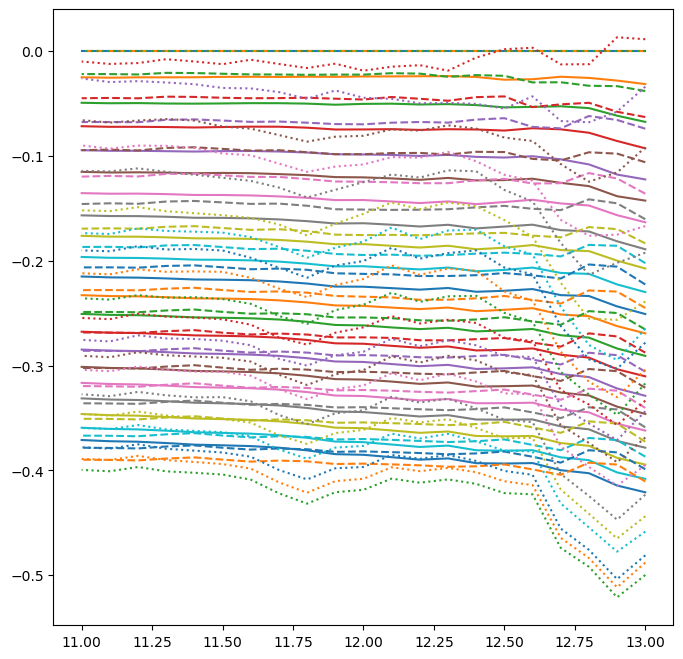

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import summary_stats
def plot_mass_bin():
    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
    xi = summary_stats.Xi(data_dir, 'HF')
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    for r_ind, ls in zip([25, 30, 35], ['solid', 'dashed', 'dotted']):
        corr_2d, mass_bins, rbins = xi._load_2d(sim_tag=xi.sim_tags[0], r_ind=r_ind, symmetric=True)
        corr_2d = np.log10(corr_2d)
        for i in range(mass_bins.size):
            ax.plot(mass_bins, corr_2d[i]-corr_2d[0], label=f'{rbins}', ls=ls)
        print(rbins)
    print(corr_2d.shape)
plot_mass_bin()